### Librerías Usadas

In [48]:
import pandas as pd
from collections import Counter
import re
import matplotlib.pyplot as plt
from wordcloud import WordCloud

### Abre Excel

In [49]:
file_postulaciones = 'Formulario de postulación - TRACK MUJERES 2024 (1).xlsx'
df = pd.read_excel(file_postulaciones)
df

,¿En qué rango de edad te encuentras?,Ciudad de residencia,¿Cuál es tu motivación y/ó expectativa para postular al programa Track de mujeres?,Grado máximo de estudios alcanzados,¿Con qué definición te identificas actualmente?,"Actualmente, ¿Cuáles son las 3 habilidades, fortalezas o conocimientos que destacarías de ti?",¿Qué habilidades o conocimientos podrías o te gustaría adquirir o mejorar a través del programa?,"Actualmente, ¿Cuál es su fuente de ingresos?",¿Tienes acceso a una computadora e internet?,¿Tienes disponibilidad de asistir presencialmente 2 días seguidos a un taller (entre junio/julio y agosto)?,¿Qué días tienes mayor disponibilidad de tiempo para capacitarte o asistencia a eventos?,¿Cuál seria el horario de preferencia?,¿Hace cuánto tiempo iniciaste en el mundo del emprendimiento?,Nombre del emprendimiento,Breve descripción en un párrafo del emprendimiento.,Rubro del emprendimiento,Antigüedad de tu emprendimiento en el que trabajas actualmente,¿Cuántas personas conforman tu emprendimiento actualmente?,¿Cómo te enteraste del programa Track Mujeres,¿Dónde sueles buscar y compartir información? ¿Tienes alguna red social o plataforma favorita para mantenerte al día?
0,31 a 35 años,El Alto,Mi motivación es estar con mujeres líderes en ...,Técnico medio o superior,Soy emprendedora,Soy una persona emprendedora y muy apasionada ...,Liderazgo para poder mejorar mi emprendimiento...,A través de mi empresa o emprendimiento,Si,Si,De lunes a viernes,Tarde,Hace menos de 1 año,Manqarapiña,Servicios de banqueteria y restaurant comida n...,Gastronomía y/ó alimentos,De 1 a 5 años,1 a 2 personas (incluida mi persona),Redes sociales Banco Sol,Tik tok
1,41 a 45 años,Cochabamba,Ser parte de una red de mujeres emprendedoras ...,Técnico medio o superior,Soy emprendedora,"Ser perseverante, ser una mujer líder, y tener...",Fortalecer más mis conocimientos \n crecer en ...,Ambos,Si,Si,Indiferente,Noche,Hace más de 5 años,"Hilos, lanas y punto",Es un emprendimiento que valoriza el tejido a ...,"Textil, moda, diseño y/ó venta de ropa",6 a 10 años,3 y 5 personas (incluida mi persona),Redes sociales Pista8,Facebook
2,36 a 40 años,La Paz,Aprender más y mejores técnicas para mejorar m...,Maestria,Soy emprendedora,"Perseverancia, motivación y compromiso",Finanzas,A través de mi empresa o emprendimiento,Si,Si,Fines de semana,Noche,Hace más de un año,"""La Estación""",Comida rápida,Gastronomía y/ó alimentos,De 1 a 5 años,1 a 2 personas (incluida mi persona),Redes sociales Banco Sol,Linkedin
3,26 a 30 años,Santa Cruz,Aprender más técnicas de ventas,Licenciatura,Trabajo como profesional independiente,"Liderazgo, compromiso,","Hábitos, resiliencia",A través de mi empresa o emprendimiento,Si,Si,Indiferente,Noche,Hace menos de 1 año,Violetta,Venta de ropa para mujeres,"Textil, moda, diseño y/ó venta de ropa",Menos de 1 año,1 a 2 personas (incluida mi persona),Redes sociales Banco Sol,Linkedin
4,36 a 40 años,Santa Cruz,Aprender más para emprender mejor,Diplomado,Soy emprendedora,"Trabajo bajo presión, agilidad, fácil aprendizaje","Poder de decision, seguridad",A través de mi empresa o emprendimiento,Si,Si,De lunes a viernes,Tarde,Hace más de un año,Dulce Adicción tortas,Realizo tortas personalizadas para distintos a...,Gastronomía y/ó alimentos,De 1 a 5 años,Sólo yo,Redes sociales Banco Sol,Linkedin
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
204,Más de 50 años,Santa Cruz,Confianza en si misma,Técnico medio o superior,En búsqueda de empleo,"Ganas de superarme,honrada y puntual",No tener miedo al exito,Aún no percibo ingresos,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
205,31 a 35 años,Santa Cruz,Aprender a manejar marketing y contabilidad bá...,Licenciatura,Soy emprendedora,"Manejo de computadora ,menejo de redes sociale...",Marketing publicidad,A través de mi empresa o emprendimiento,Si,Si,De lunes a viernes,Tarde,Hace menos de 1 año,Tienda regalos y accesorios,Regalos para todo acontecimientos,Tecnología,M

# CATEGORIZACIÓN DE COLUMNAS

- Se realizará un NLP a las columnas donde el usuario escribió para categorizarlas

---

# Columna '¿Cuál es tu motivación y/ó expectativa para postular al programa Track de mujeres?'

In [155]:
# Selecciona la columna
columna_interes_uno = df['¿Cuál es tu motivación y/ó expectativa para postular al programa Track de mujeres?']

# Combina los textos de la columna en una sola cadena
texto_comb_uno = ' '.join(columna_interes_uno.dropna().astype(str))

# Elimina caracteres no alfanuméricos y convertir a minúsculas
palabras_uno = re.findall(r'\b\w+\b', texto_comb_uno.lower())

# Define una lista de stopwords
stopwords_uno = {'la', 'el', 'mi', 'y', 'de', 'que', 'en', 'a', 'los', 'las', 'un', 'una', 'con', 'por', 'para', 'es', 'al', 'lo', 'como', 'más', 'mis', 'me', 'del', 'así', 'ser', 'su', 'muy', 'o'}

# Filtra las stopwords
palabras_filtradas_uno = [palabra for palabra in palabras_uno if palabra not in stopwords_uno]

# Cuenta la frecuencia de cada palabra
conteo_palabras_uno = Counter(palabras_filtradas_uno)

# Obtiene las 250 palabras más comunes
palabras_comunes_uno = conteo_palabras_uno.most_common(250)

# Muestra las palabras más comunes
palabras_comunes_uno


[('emprendimiento', 77),
 ('aprender', 67),
 ('mejorar', 40),
 ('poder', 40),
 ('negocio', 39),
 ('crecer', 38),
 ('conocimientos', 30),
 ('hacer', 28),
 ('adquirir', 24),
 ('mujeres', 22),
 ('herramientas', 22),
 ('habilidades', 22),
 ('emprender', 21),
 ('quiero', 19),
 ('motivación', 15),
 ('nuevas', 15),
 ('potenciar', 15),
 ('tener', 15),
 ('fortalecer', 11),
 ('conocimiento', 11),
 ('desarrollar', 10),
 ('mejor', 9),
 ('trabajo', 9),
 ('lograr', 9),
 ('emprendedoras', 8),
 ('ya', 8),
 ('tengo', 8),
 ('este', 8),
 ('deseo', 8),
 ('mas', 8),
 ('manera', 7),
 ('mujer', 7),
 ('crecimiento', 7),
 ('personas', 7),
 ('networking', 7),
 ('emprendedora', 7),
 ('ventas', 6),
 ('seguir', 6),
 ('ayuden', 6),
 ('otras', 6),
 ('empresa', 6),
 ('programa', 6),
 ('todo', 6),
 ('día', 6),
 ('capacitarme', 6),
 ('clientes', 6),
 ('parte', 5),
 ('red', 5),
 ('tiempo', 5),
 ('independiente', 5),
 ('generar', 5),
 ('necesito', 5),
 ('personal', 5),
 ('sobre', 5),
 ('propio', 5),
 ('nuevos', 5),
 ('tr

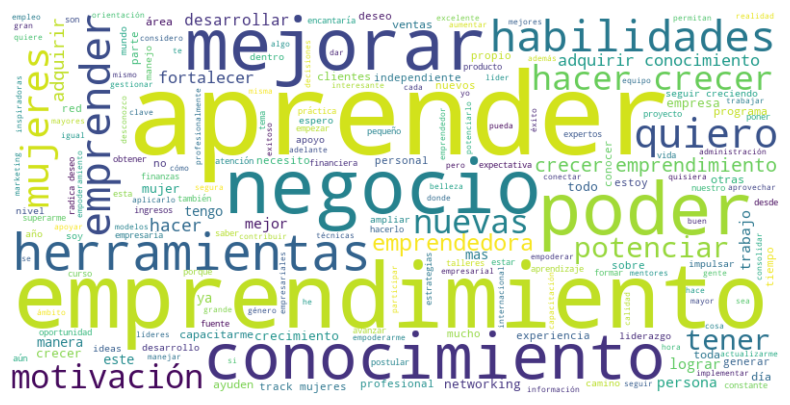

In [156]:
# Une las palabras filtradas de nuevo en un solo texto
texto_filtrado_uno = ' '.join(palabras_filtradas_uno)

# Crea la nube de palabras
wordcloud_uno = WordCloud(width=800, height=400, background_color='white', stopwords=stopwords_uno).generate(texto_filtrado_uno)

# Muestra la nube de palabras
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud_uno, interpolation='bilinear')
plt.axis('off')  # No mostrar los ejes
plt.show()

In [168]:
# Define las categorías y las palabras/frases clave asociadas
categorias_uno = {
    'Crecer personalmente y actualizar sus conocimientos.': ['crecer', 'conocimientos', 'adquirir', 'potenciar', 'conocimiento', 'desarrollar', 'habilidades', 'fortalecer', 'crecimiento', 'capacitarme', 'superarme', 'actualizarme', 'aprendizaje'],
    'Mejorar el trabajo en equipo y aumentar las ventas de su emprendimiento.': ['mejorar', 'trabajo', 'equipo', 'ventas', 'emprendimiento', 'negocio', 'lograr', 'empresa', 'clientes', 'networking', 'generar', 'liderazgo', 'emprendedor', 'aumentar', 'mejores', 'ventas', 'negocios'],
    'Aprender más sobre estrategias de marketing y el uso de nuevas tecnologías.': ['aprender', 'estrategias', 'marketing', 'tecnologías', 'nuevas', 'herramientas', 'programa', 'ideas', 'expertos', 'innovación', 'técnicas', 'actualizarme'],
    'Posicionar su emprendimiento a nivel local y nacional.': ['posicionar', 'emprendimiento', 'nivel', 'local', 'nacional', 'impulsar', 'crecimiento', 'estrategias'],
    'Conocer y aprender de mujeres que también están emprendiendo.': ['conocer', 'mujeres', 'emprendiendo', 'emprendedoras', 'red', 'parte', 'otras', 'formar', 'apoyo', 'networking', 'mentores', 'inspiradoras'],
    'Solventar los gastos del hogar.': ['solventar', 'gastos', 'hogar', 'financiera', 'necesito', 'ingresos'],
    'Ser dueñas de su tiempo.': ['dueñas', 'tiempo', 'tener', 'independiente', 'vida', 'gestionar', 'tiempo', 'organización']
}

# Define una función de categorización
def categorizar_descripcion_uno(descripcion_uno):
    descripcion_uno = descripcion_uno.lower()  # Convertir a minúsculas para la comparación
    for categoria_uno, palabras_clave_uno in categorias_uno.items():
        for palabra_clave_uno in palabras_clave_uno:
            if palabra_clave_uno in descripcion_uno:
                return categoria_uno
    return 'Otro'

# Aplica la función a la columna
df['Categorizacion_Motivacion_Expectativa_Postulacion'] = df['¿Cuál es tu motivación y/ó expectativa para postular al programa Track de mujeres?'].apply(categorizar_descripcion_uno)



In [169]:
# cuenta la cantidad de valores que aparecen luego de categorizar la columna 
df['Categorizacion_Motivacion_Expectativa_Postulacion'].value_counts()


Categorizacion_Motivacion_Expectativa_Postulacion
Crecer personalmente y actualizar sus conocimientos.                           115
Mejorar el trabajo en equipo y aumentar las ventas de su emprendimiento.        61
Aprender más sobre estrategias de marketing y el uso de nuevas tecnologías.     18
Otro                                                                            10
Ser dueñas de su tiempo.                                                         3
Solventar los gastos del hogar.                                                  2
Name: count, dtype: int64

---

# Columna 'Actualmente, ¿Cuáles son las 3 habilidades, fortalezas o conocimientos que destacarías de ti?'

In [185]:
# Selecciona la columna de interés
columna_interes_dos = df['Actualmente, ¿Cuáles son las 3 habilidades,  fortalezas o conocimientos que destacarías de ti?']

# Combina todos los textos de la columna en una sola cadena
texto_comb_dos = ' '.join(columna_interes_dos.dropna().astype(str))

# Elimina caracteres no alfanuméricos y convertir a minúsculas
palabras_dos = re.findall(r'\b\w+\b', texto_comb_dos.lower())

# Define una lista de stopwords
stopwords_dos = {'la', 'el', 'mi', 'y', 'de', 'que', 'en', 'a', 'los', 'las', 'un', 'una', 'con', 'por', 'para', 'es', 'al', 'lo', 'como', 'más', 'mis', 'me', 'del', 'así', 'ser', 'su', 'muy', 'o', 'no', 'si', 'se', 'he', 'pero', 'algo','cómo', 'nos','da', 'soy'}

# Filtra las stopwords
palabras_filtradas_dos = [palabra for palabra in palabras_dos if palabra not in stopwords_dos]

# Cuenta la frecuencia de cada palabra
conteo_palabras_dos = Counter(palabras_filtradas_dos)

# Obtiene las 250 palabras más comunes
palabras_comunes_dos = conteo_palabras_dos.most_common(250)

# Muestra las palabras más comunes
palabras_comunes_dos

[('perseverancia', 42),
 ('trabajo', 23),
 ('creatividad', 22),
 ('creativa', 20),
 ('liderazgo', 18),
 ('aprender', 17),
 ('equipo', 17),
 ('responsable', 15),
 ('gusta', 14),
 ('capacidad', 13),
 ('persistente', 13),
 ('responsabilidad', 12),
 ('persona', 10),
 ('compromiso', 10),
 ('aprendo', 10),
 ('rápido', 10),
 ('conocimiento', 10),
 ('conocimientos', 10),
 ('emprendedora', 9),
 ('perseverante', 9),
 ('tengo', 9),
 ('comunicación', 9),
 ('empatía', 9),
 ('problemas', 9),
 ('siempre', 8),
 ('puntualidad', 8),
 ('personas', 8),
 ('facilidad', 8),
 ('ganas', 7),
 ('sociales', 7),
 ('3', 7),
 ('organizada', 7),
 ('pasión', 7),
 ('curiosidad', 7),
 ('manejo', 7),
 ('empatia', 6),
 ('redes', 6),
 ('2', 6),
 ('todo', 6),
 ('habilidad', 6),
 ('habilidades', 6),
 ('mujer', 5),
 ('motivación', 5),
 ('aprendizaje', 5),
 ('1', 5),
 ('ventas', 5),
 ('proactividad', 5),
 ('trabajadora', 5),
 ('emprendimiento', 5),
 ('buena', 5),
 ('resiliente', 5),
 ('proactiva', 5),
 ('paciencia', 5),
 ('con

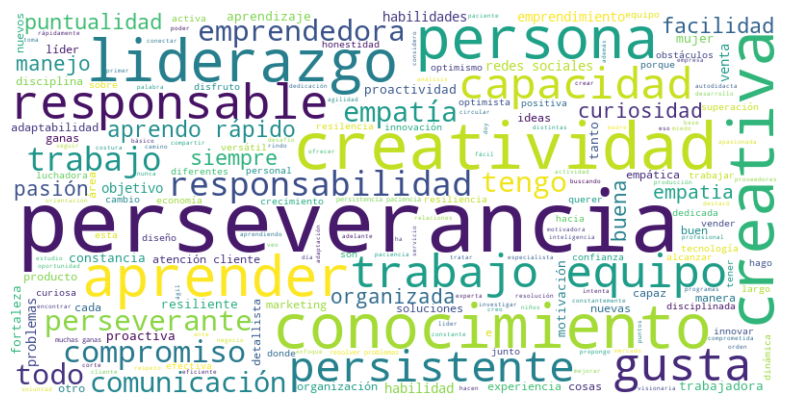

In [188]:
# Une las palabras filtradas de nuevo en un solo texto
texto_filtrado_dos = ' '.join(palabras_filtradas_dos)

# Crea la nube de palabras
wordcloud_dos = WordCloud(width=800, height=400, background_color='white', stopwords=stopwords_dos).generate(texto_filtrado_dos)

# Muestra la nube de palabras
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud_dos, interpolation='bilinear')
plt.axis('off')  # No mostrar los ejes
plt.show()

In [186]:
# Palabras clave más usadas y sus respectivas categorías
# Define las categorías y sus palabras clave
palabras_claves_dos = {
    'Emprendimiento e Innovación': [
        'emprendedora', 'emprendimiento', 'innovación', 'innovar', 'ideas', 'soluciones', 'visionaria', 
        'productos', 'producción', 'cosmetologia', 'estética', 'cosas', 'crear', 'negocio', 'servicio', 
        'mercado', 'postres', 'chocolateria'
    ],
    'Liderazgo y Empoderamiento': [
        'liderazgo', 'líder', 'empoderamiento', 'lider', 'líder', 'toma', 'adelante', 'guiar', 'orientación', 
        'responsable', 'orientación'
    ],
    'Resiliencia y Determinación': [
        'perseverancia', 'persistente', 'perseverante', 'resiliente', 'constancia', 'detallista', 'luchadora', 
        'superación', 'optimista', 'versátil', 'positiva', 'optimismo', 'dedicación', 'resolución', 'eficiente', 
        'nunca', 'rindo', 'perseverancia', 'persistencia', 'resilencia', 'constante'
    ],
    'Trabajo en Equipo y Colaboración': [
        'equipo', 'colaboración', 'trabajo en equipo', 'trabajo', 'trabajar', 'organizada', 'persona', 'personas', 
        'facilidad', 'sociales', 'colaborativa', 'compartir', 'juntos', 'colaboración', 'clientes', 'relaciones', 
        'proactiva', 'clientes', 'proveedores', 'comprometida'
    ],
    'Desarrollo Personal y Profesional': [
        'desarrollo personal', 'desarrollo profesional', 'crecimiento', 'aprendizaje', 'aprender', 'aprendo', 
        'capacitación', 'capacidad', 'conocimiento', 'conocimientos', 'crecimiento personal', 'experiencia', 
        'disciplinada', 'desarrollo', 'dedicada', 'mejorar', 'profesional', 'especialista', 'seguimiento', 
        'estudios', 'investigar', 'constante', 'autodidacta', 'actividad', 'eventos', 'inteligencia', 'habilidades'
    ],
    'Comunicación y Redes': [
        'comunicación', 'redes sociales', 'habilidades de comunicación', 'comunicacion', 'redes', 'habilidades', 
        'conectar', 'sociales', 'marketing', 'tecnología', 'tics'
    ],
    'Flexibilidad y Adaptabilidad': [
        'flexibilidad', 'adaptabilidad', 'capacidad de adaptarse', 'adaptarse', 'adaptabilidad', 'adaptable', 
        'capaz', 'capacidad', 'adaptación', 'versatil'
    ],
    'Iniciativa y Autonomía': [
        'iniciativa', 'autonomía', 'tomar la iniciativa', 'proactividad', 'proactiva', 'autonoma', 'autodidacta', 
        'propongo', 'emprendedora', 'motivadora', 'intenta', 'motivación'
    ],
    'Creatividad y Solución de Problemas': [
        'creatividad', 'solución de problemas', 'encontrar soluciones creativas', 'ideas', 'creativa', 'resolver', 
        'resolver problemas', 'innovadora', 'creativa', 'diseño', 'efectivas', 'soluciones', 'resolución'
    ],
    'Pasión por el Emprendimiento': [
        'pasión', 'motivación', 'entusiasmo', 'pasión por emprender', 'emprendimiento', 'gusta', 'apasionada', 
        'motivadora', 'compromiso', 'comprometida', 'dedicación', 'amo', 'encanta'
    ],
    'Responsabilidad y Compromiso': [
        'responsabilidad', 'responsable', 'compromiso', 'comprometida', 'puntualidad', 'honestidad', 'dedicación', 
        'compromiso', 'constante', 'orden', 'proactiva', 'puntual'
    ],
    'Paciencia y Resiliencia': [
        'paciencia', 'resiliencia', 'resiliente', 'paciente', 'resilente', 'paciente', 'resilente', 'resiliencia', 
        'paciencia', 'resilencia', 'paciente', 'paciencia'
    ],
    'Curiosidad y Aprendizaje': [
        'curiosidad', 'curiosa', 'aprendizaje', 'aprendo', 'investigar', 'curiosidad', 'aprendizaje', 'curiosa', 
        'curiosidad', 'aprendizaje', 'curiosidad', 'aprendizaje', 'curiosa', 'aprendizaje'
    ]
}

# Función para categorizar 
def categorizar_dos(frustracion, palabras_clave_dos):
    for categoria, keywords in palabras_clave_dos.items():
        if any(keyword in frustracion.lower() for keyword in keywords):
            return categoria
    return "Otras"

# Aplica la categorización a la columna 
df['Categoria_Habilidades_Destacadas'] = df['Actualmente, ¿Cuáles son las 3 habilidades,  fortalezas o conocimientos que destacarías de ti?'].apply(lambda x: categorizar_dos(x, palabras_claves_dos))

#df

In [187]:
df['Categoria_Habilidades_Destacadas'].value_counts()   #método usado para contar las categorías

Categoria_Habilidades_Destacadas
Resiliencia y Determinación            72
Emprendimiento e Innovación            40
Liderazgo y Empoderamiento             32
Trabajo en Equipo y Colaboración       19
Desarrollo Personal y Profesional      14
Otras                                  13
Creatividad y Solución de Problemas     7
Responsabilidad y Compromiso            7
Comunicación y Redes                    2
Curiosidad y Aprendizaje                1
Iniciativa y Autonomía                  1
Flexibilidad y Adaptabilidad            1
Name: count, dtype: int64

----

# Columna '¿Qué habilidades o conocimientos podrías o te gustaría adquirir o mejorar a través del programa?'

In [199]:
# Selecciona la columna de interés
columna_interes_tres = df['¿Qué habilidades o conocimientos podrías o te gustaría adquirir o mejorar a través del programa?']

# Combina los textos de la columna en una sola cadena
texto_comb_tres = ' '.join(columna_interes_tres.dropna().astype(str))

# Elimina caracteres no alfanuméricos y convertir a minúsculas
palabras_tres = re.findall(r'\b\w+\b', texto_comb_tres.lower())

# Define una lista de stopwords
stopwords_tres = {'la', 'el', 'mi', 'y', 'de', 'que', 'en', 'a', 'los', 'las', 'un', 'una', 'con', 'por', 'para', 'es', 'al', 'lo', 'como', 'más', 'mis', 'me', 'del', 'así', 'ser', 'su', 'muy', 'o', 'si', 'no', 'ha', 'son', 'esta', 'doy', 'soy'}

# Filtra las stopwords
palabras_filtradas_tres = [palabra_tres for palabra_tres in palabras_tres if palabra_tres not in stopwords_tres]

# Cuenta la frecuencia de cada palabra
conteo_palabras_tres = Counter(palabras_filtradas_tres)

# Obtiene las palabras más comunes
palabras_comunes_tres = conteo_palabras_tres.most_common(300)

# Muestra las palabras más comunes
palabras_comunes_tres

[('marketing', 46),
 ('finanzas', 34),
 ('ventas', 30),
 ('mejorar', 27),
 ('manejo', 27),
 ('emprendimiento', 25),
 ('aprender', 24),
 ('sobre', 22),
 ('habilidades', 21),
 ('negocio', 20),
 ('liderazgo', 19),
 ('redes', 19),
 ('gustaría', 18),
 ('poder', 16),
 ('mejor', 15),
 ('digital', 13),
 ('conocimientos', 12),
 ('herramientas', 12),
 ('equipo', 11),
 ('adquirir', 11),
 ('estrategias', 11),
 ('negocios', 10),
 ('costos', 10),
 ('técnicas', 9),
 ('conocimiento', 9),
 ('comunicación', 9),
 ('sociales', 9),
 ('administración', 8),
 ('manera', 8),
 ('gestión', 8),
 ('trabajo', 7),
 ('quiero', 7),
 ('todo', 7),
 ('crecer', 6),
 ('vender', 6),
 ('manejar', 6),
 ('tener', 6),
 ('publicidad', 6),
 ('planificación', 6),
 ('financiera', 6),
 ('negociación', 6),
 ('capacidad', 6),
 ('digitales', 6),
 ('cómo', 6),
 ('nuevas', 5),
 ('conocer', 5),
 ('encantaría', 5),
 ('productos', 5),
 ('toma', 5),
 ('lograr', 5),
 ('tiempo', 5),
 ('llegar', 5),
 ('saber', 5),
 ('hacer', 5),
 ('personas', 5

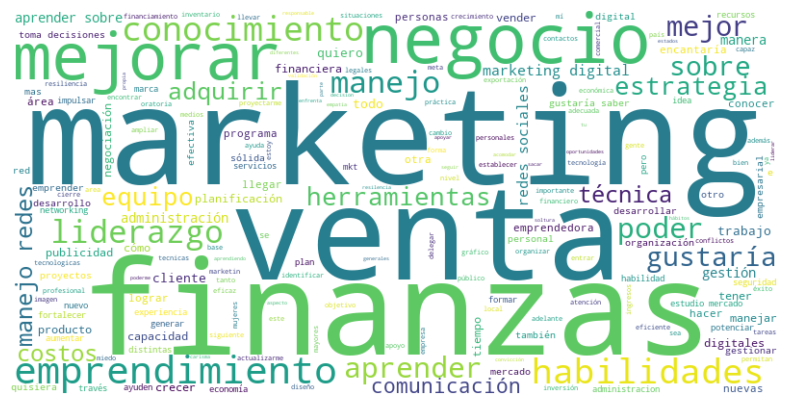

In [195]:
# Une las palabras filtradas de nuevo en un solo texto
texto_filtrado_tres = ' '.join(palabras_filtradas_tres)

# Crea la nube de palabras
wordcloud_tres = WordCloud(width=800, height=400, background_color='white', stopwords=stopwords_tres).generate(texto_filtrado_tres)

# Muestra la nube de palabras
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud_tres, interpolation='bilinear')
plt.axis('off')  # No mostrar los ejes
plt.show()

In [200]:
# Define las categorías y sus palabras clave
categorias_tres = {
    'Toma de decisiones y negociación': [
        'decisiones', 'negociación', 'estrategia', 'resolución', 'conflictos', 'resolver', 'planificar', 
        'negociar', 'toma', 'determinar', 'necesidades', 'adecuadas', 'escalar', 'etapas', 'asertiva', 
        'flexibilidad', 'acuerdos', 'mutuamente', 'beneficiosos', 'constructiva', 'convenios', 'negociaciones', 
        'favorables', 'negociador', 'acertiva'
    ],
    'Finanzas_financiamiento': [
        'finanzas', 'financiamiento', 'inversiones', 'presupuesto', 'costos', 'economía', 'análisis', 'negocio', 
        'productos', 'ingresos', 'financiera', 'inversión', 'empresa', 'financieros', 'dinero', 'contabilidad', 
        'gastos', 'económicas', 'negociaciones'
    ],
    'Marketing digital': [
        'marketing', 'digital', 'redes', 'sociales', 'publicidad', 'mercado', 'ventas', 'comunicación', 
        'vender', 'estrategia', 'herramientas', 'nuevas', 'planificación', 'plan', 'mkt', 'mercados', 'clientes'
    ],
    'Herramientas digitales': [
        'herramientas', 'digitales', 'software', 'aplicaciones', 'tecnología', 'manejo', 'programas', 
        'técnicas', 'medios', 'administración', 'administrar', 'adminsistracion', 'tecnologicas', 'actualizarme', 'red'
    ],
    'Ventas con propósito': [
        'ventas', 'propósito', 'cliente', 'valor', 'impacto', 'atención', 'servicio', 'relaciones', 'clientes', 
        'calidad', 'detallista', 'efectivas', 'eficiente', 'efectiva', 'cierre', 'sólidas', 'negociador', 'estrategia'
    ],
    'Desarrollo personal y habilidades blandas': [
        'perseverancia', 'creatividad', 'liderazgo', 'trabajo', 'equipo', 'responsable', 'empatía', 'resiliencia', 
        'adaptabilidad', 'disciplina', 'motivación', 'paciencia', 'comunicación', 'proactividad', 'organización', 
        'adaptación', 'dedicación', 'curiosidad', 'crecimiento', 'responsabilidad', 'mujer', 'compromiso', 
        'rápido', 'perseverante', 'puntualidad', 'personas', 'facilidad', 'ganas', 'aprendizaje', 
        'resiliente', 'proactiva', 'constancia', 'detallista', 'empática',  'ideas', 'soluciones', 
        'fortalezas',  'problemas', 'experiencia', 'honestidad', 'hacia', 'luchadora', 'versátil', 
        'positiva', 'optimismo', 'superación', 'apasionada', 'motivadora', 'mejorar', 'presión', 'agilidad', 
        'paciente', 'actividad', 'orden', 'encanta', 'constante', 'autodidacta', 'tratar', 
        'poder', 'juntos', 'oportunidad', 'desafío', 'constantemente', 'voluntad', 'destacó', 'profesional', 
        'especialista', 'análisis', 'crear', 'cambios', 'comprometida', 'resolución', 'rápidamente', 
        'enfoque', 'fortaleza', 'desarrollo', 'experta', 'lider', 'visionaria', 
        'producción', 'respeto', 'conectar', 'capacitación', 
        'realizar', 'lograrlo', 'amo', 'negociar', 'planificar', 'ejecutar', 'eventos', 'innovadora', 
        'poder', 'adquirir', 'estrategias',
        'nuevas', 'conocer', 'productos', 'lograr', 'tiempo', 'llegar', 'saber', 'hacer', 
        'empresarial', 'programa', 'decisiones', 'personal', 'desarrollar', 
        'gestionar', 'quisiera', 'fortalecer', 'seguridad', 'ayuden', 
        'aumentar', 'generar', 'estudio', 'impulsar', 'administracion', 'habilidad', 'formar', 
        'economía', 'networking', 'plan', 'potenciar', 'servicios', 
        'situaciones', 'país', 'permitan', 'adelante', 'eficaz', 'idea', 'miedo', 'inversión', 'medios', 
        'ayuda', 'crecimiento', 
        'tecnicas', 'gente', 'apoyo', 'forma', 'sólidas', 'cambio', 'nivel', 
        'conflictos', 'eficiente', 'ampliar', 'establecer', 'entrar', 
        'atención', 'organizar', 'personales', 'sólida', 'efectiva', 'delegar', 'imagen', 'oratoria', 
        'público', 'identificar', 'mayores', 'proyectarme', 'mujeres', 'llevar', 
        'contactos', 'actualizarme', 'resilencia', 'acomodar','enfrenta', 
        'decision', 'oportunidades', 'seguir', 'aprendiendo', 
        'convicción', 'empatia', 'sacar', 'generales', 'liderar', 'carisma', 'soltura',
        'validación', 'poderme', 'apoyar',  'equipos', 'dirigir', 
        'enseñanza', 'nuevo',  'administrar', 'factores', 'fundamentales', 'expertos', 
        'apto', 'mediante', 'comunidad', 'disertantes', 'adminsistracion', 'general', 'storytelling', 'relacionamiento', 
        'captacion', 'involucre', 'quiera', 'ayudar', 'multidisciplinario', 
        'convirtiendonos', 'apoyarlos', 'educacionales', 'apertura', 'relacionamiento', 
        'siguientes', 'organizacional', 'acuerdos', 'mutuamente', 'beneficiosos', 'constructiva', 'convenios', 
        'acertiva', 'adecuado', 
        'determinar', 'necesidades', 'adecuadas', 'asertiva', 'flexibilidad',  
        'contexto', 'bastante', 'vinculados', 'asentar', 'consultorias', 
        'desenvolverme', 'encuentro', 'múltiples', 'responsabilidades', 'requieren', 'simultánea', 
        'prácticas', 'priorizar'
    ],
}

# Define una función de categorización
def categorizar_descripcion_tres(descripcion_tres):
    descripcion_tres = descripcion_tres.lower()  # Convertir a minúsculas para la comparación
    for categoria_tres, palabras_claves_tres in categorias_tres.items():
        for palabra_clave_tres in palabras_claves_tres:
            if palabra_clave_tres in descripcion_tres:
                return categoria_tres
    return 'Otro'

# Aplica la función a la columna 'Descripcion'
df['Categorizacion_Habilidad_Adquisicion'] = df['¿Qué habilidades o conocimientos podrías o te gustaría adquirir o mejorar a través del programa?'].apply(categorizar_descripcion_tres)



In [201]:
#método usado para contar las categorías
df['Categorizacion_Habilidad_Adquisicion'].value_counts()

Categorizacion_Habilidad_Adquisicion
Finanzas_financiamiento                      74
Marketing digital                            56
Desarrollo personal y habilidades blandas    36
Toma de decisiones y negociación             24
Herramientas digitales                        9
Otro                                          8
Ventas con propósito                          2
Name: count, dtype: int64

In [202]:
df

,¿En qué rango de edad te encuentras?,Ciudad de residencia,¿Cuál es tu motivación y/ó expectativa para postular al programa Track de mujeres?,Grado máximo de estudios alcanzados,¿Con qué definición te identificas actualmente?,"Actualmente, ¿Cuáles son las 3 habilidades, fortalezas o conocimientos que destacarías de ti?",¿Qué habilidades o conocimientos podrías o te gustaría adquirir o mejorar a través del programa?,"Actualmente, ¿Cuál es su fuente de ingresos?",¿Tienes acceso a una computadora e internet?,¿Tienes disponibilidad de asistir presencialmente 2 días seguidos a un taller (entre junio/julio y agosto)?,...,Nombre del emprendimiento,Breve descripción en un párrafo del emprendimiento.,Rubro del emprendimiento,Antigüedad de tu emprendimiento en el que trabajas actualmente,¿Cuántas personas conforman tu emprendimiento actualmente?,¿Cómo te enteraste del programa Track Mujeres,¿Dónde sueles buscar y compartir información? ¿Tienes alguna red social o plataforma favorita para mantenerte al día?,Categorizacion_Motivacion_Expectativa_Postulacion,Categorizacion_Habilidad_Adquisicion,Categoria_Habilidades_Destacadas
0,31 a 35 años,El Alto,Mi motivación es estar con mujeres líderes en ...,Técnico medio o superior,Soy emprendedora,Soy una persona emprendedora y muy apasionada ...,Liderazgo para poder mejorar mi emprendimiento...,A través de mi empresa o emprendimiento,Si,Si,...,Manqarapiña,Servicios de banqueteria y restaurant comida n...,Gastronomía y/ó alimentos,De 1 a 5 años,1 a 2 personas (incluida mi persona),Redes sociales Banco Sol,Tik tok,Mejorar el trabajo en equipo y aumentar las ve...,Finanzas_financiamiento,Emprendimiento e Innovación
1,41 a 45 años,Cochabamba,Ser parte de una red de mujeres emprendedoras ...,Técnico medio o superior,Soy emprendedora,"Ser perseverante, ser una mujer líder, y tener...",Fortalecer más mis conocimientos \n crecer en ...,Ambos,Si,Si,...,"Hilos, lanas y punto",Es un emprendimiento que valoriza el tejido a ...,"Textil, moda, diseño y/ó venta de ropa",6 a 10 años,3 y 5 personas (incluida mi persona),Redes sociales Pista8,Facebook,Mejorar el trabajo en equipo y aumentar las ve...,Finanzas_financiamiento,Liderazgo y Empoderamiento
2,36 a 40 años,La Paz,Aprender más y mejores técnicas para mejorar m...,Maestria,Soy emprendedora,"Perseverancia, motivación y compromiso",Finanzas,A través de mi empresa o emprendimiento,Si,Si,...,"""La Estación""",Comida rápida,Gastronomía y/ó alimentos,De 1 a 5 años,1 a 2 personas (incluida mi persona),Redes sociales Banco Sol,Linkedin,Mejorar el trabajo en equipo y aumentar las ve...,Finanzas_financiamiento,Resiliencia y Determinación
3,26 a 30 años,Santa Cruz,Aprender más técnicas de ventas,Licenciatura,Trabajo como profesional independiente,"Liderazgo, compromiso,","Hábitos, resiliencia",A través de mi empresa o emprendimiento,Si,Si,...,Violetta,Venta de ropa para mujeres,"Textil, moda, diseño y/ó venta de ropa",Menos de 1 año,1 a 2 personas (incluida mi persona),Redes sociales Banco Sol,Linkedin,Mejorar el trabajo en equipo y aumentar las ve...,Desarrollo personal y habilidades blandas,Liderazgo y Empoderamiento
4,36 a 40 años,Santa Cruz,Aprender más para emprender mejor,Diplomado,Soy emprendedora,"Trabajo bajo presión, agilidad, fácil aprendizaje","Poder de decision, seguridad",A través de mi empresa o emprendimiento,Si,Si,...,Dulce Adicción tortas,Realizo tortas personalizadas para distintos a...,Gastronomía y/ó alimentos,De 1 a 5 años,Sólo yo,Redes sociales Banco Sol,Linkedin,Aprender más sobre estrategias de marketing y ...,Desarrollo personal y habilidades blandas,Trabajo en Equipo y Colaboración
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
204,Más de 50 años,Santa Cruz,Confianza en si misma,Técnico medio o superior,En búsqueda de empleo,"Ganas de superarme,honrada y puntual",No tener miedo al exito,Aún no percibo ingresos,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Otro,Desarrollo personal y habilidades blandas,Respo

In [203]:
df.to_csv('Programa_Track_Mujeres_2024.csv', index=False)